In [ ]:
# Install on Google Colab server the ocean-data-parser package
%pip install git+https://github.com/HakaiInstitute/ocean-data-parser.git@odf-parser

In [54]:
# Load packages

from ocean_data_parser.read.dfo import bio_odf
import requests


# Download an ODF locally from GitHub

In [55]:
# Download from the ocean-data-parser repository one BIO ODF test file for demonstration purposes
odf_file_url = "https://raw.githubusercontent.com/HakaiInstitute/ocean-data-parser/odf-parser/tests/parsers_test_files/dfo/odf/bio/CTD_HUD2018030_008_01_DN.ODF"
odf_file_path = "CTD_98911_10P_11_DN.ODF"
response = requests.get(odf_file_url)
with open(odf_file_path, "w") as f:
    f.write(response.text)


# Read the ODF file to xarray dataset

In [56]:
# Read demonstration file
ds = bio_odf(odf_file_path)
ds


<xarray.Dataset>
Dimensions:                 (depth: 140)
Coordinates:
  * depth                   (depth) float64 3.968 4.96 5.952 ... 140.8 141.8
    time                    datetime64[ns] 2018-09-15T23:04:40
    latitude                float64 44.27
    longitude               float64 -63.32
Data variables: (12/82)
    measurement_time        (depth) datetime64[ns] 2018-09-15T23:11:40 ... 20...
    ScanNumber              (depth) float64 1.01e+04 1.024e+04 ... 1.879e+04
    QCNTR_01                (depth) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PRESPR01                (depth) float64 4.0 5.0 6.0 ... 141.0 142.0 143.0
    QPRES_01                (depth) int32 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TEMPS601                (depth) float64 20.51 20.56 20.55 ... 9.037 9.042
    ...                      ...
    OxygenSensor_2          <U554 '{"@SensorID": "38", "SerialNumber": "0042"...
    Fluorometer             <U113 '{"@SensorID": "69", "SerialNumber": "3668"...
    FluoroSeapointSensor    <U115 '{"@SensorID": "11", "SerialNumber": "6210"...
    pH_Sensor               <U116 '{"@SensorID": "43", "SerialNumber": "1129"...
    TurbidityMeter          <U134 '{"@SensorID": "70", "SerialNumber": "1490"...
    SPAR_Sensor             <U144 '{"@SensorID": "51", "SerialNumber": "1043"...
Attributes: (12/83)
    organization:                    Fisheries and Ocean Canada - Pêche et Oc...
    institution:                     DFO BIO
    country:                         Canada
    ioc_country_code:                18
    iso_3166_country_code:           CA
    ices_edmo_code:                  1811
    ...                              ...
    internal_processing_notes:       2019-03-28T14:09:28Z During the creation...
    odf_data_type:                   CTD
    original_odf_header:             ODF_HEADER,\n  FILE_SPECIFICATION='CTD_H...
    original_odf_header_json:        {\n"ODF_HEADER": {\n"FILE_SPECIFICATION"...
    seabird_processing_modules:      # datcnv_date = Mar 28 2019 14:09:21, 7....
    sounding:                        -99.9

# Plot data

## Profile

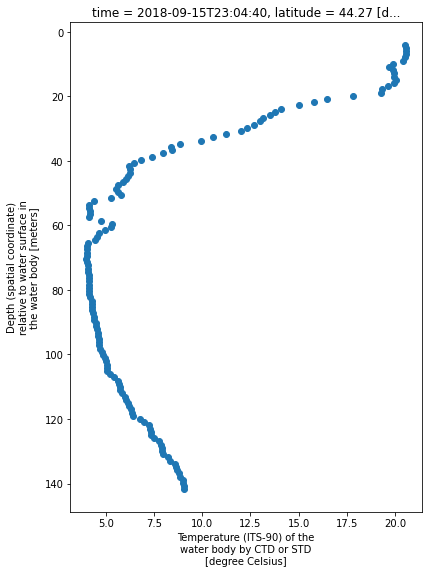

In [57]:
fig = ds.plot.scatter(x="TEMPS901", y="depth", size=9, aspect=0.7)
fig.axes.invert_yaxis()


## TS Diagram

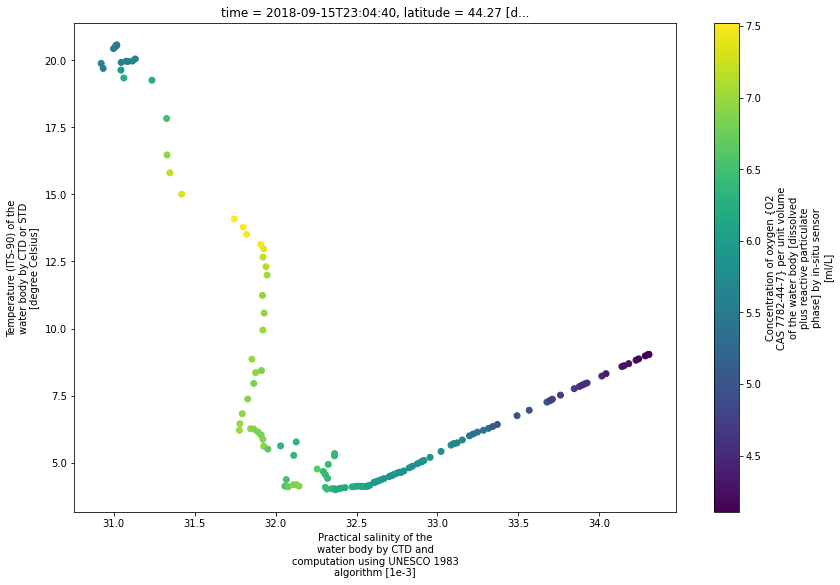

In [58]:
fig = ds.plot.scatter(
    x="PSALST01", y="TEMPS901", hue="DOXYZZ01", size=9, aspect=1.5
)
